In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


 Target -> IMC

 Preditores -> Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS

In [2]:
df = pd.read_csv("Dados_Trabalho_TP2.csv")

df.drop(columns=df.columns[0],axis=1, inplace=True)
df.dropna(inplace=True)


Analisar os dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Genero                        2111 non-null   object 
 1   Idade                         2111 non-null   float64
 2   Altura                        2111 non-null   float64
 3   Peso                          2111 non-null   float64
 4   Historico_obesidade_familiar  2111 non-null   object 
 5   FCCAC                         2111 non-null   object 
 6   FCV                           2111 non-null   float64
 7   NRP                           2111 non-null   float64
 8   CCER                          2111 non-null   object 
 9   Fumador                       2111 non-null   object 
 10  CA                            2111 non-null   float64
 11  MCC                           2111 non-null   object 
 12  FAF                           2111 non-null   float64
 13  TUD

In [4]:
df.head()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
0,Feminino,21.0,1.62,64.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,0.0,1.0,Nao,Transportes_Publicos,Peso_Normal
1,Feminino,21.0,1.52,56.0,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.0,Sim,3.0,0.0,Ocasionalmente,Transportes_Publicos,Peso_Normal
2,Masculino,23.0,1.80,77.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,1.0,Frequentemente,Transportes_Publicos,Peso_Normal
3,Masculino,27.0,1.80,87.0,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,0.0,Frequentemente,Caminhada,Excesso_Peso_Grau_I
4,Masculino,22.0,1.78,89.8,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.0,Nao,0.0,0.0,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II


In [5]:
df.describe()

,Idade,Altura,Peso,FCV,NRP,CA,FAF,TUDE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.isnull().sum()*100/df.shape[0]

Genero                          0.0
Idade                           0.0
Altura                          0.0
Peso                            0.0
Historico_obesidade_familiar    0.0
FCCAC                           0.0
FCV                             0.0
NRP                             0.0
CCER                            0.0
Fumador                         0.0
CA                              0.0
MCC                             0.0
FAF                             0.0
TUDE                            0.0
CBA                             0.0
TRANS                           0.0
Label                           0.0
dtype: float64

In [7]:
binaryClasses = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
numerical_columns = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
class_columns = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
multiple_classes_columns = ["CCER", "CBA", "TRANS","Label"]

label_Encoder = LabelEncoder()

for coluna in binaryClasses:
    df[coluna] = label_Encoder.fit_transform(df[coluna].values)

for coluna in multiple_classes_columns:
    df[coluna] = label_Encoder.fit_transform(df[coluna].values)


df['IMC'] = df['Peso'] / (df['Altura'] *df['Altura'])

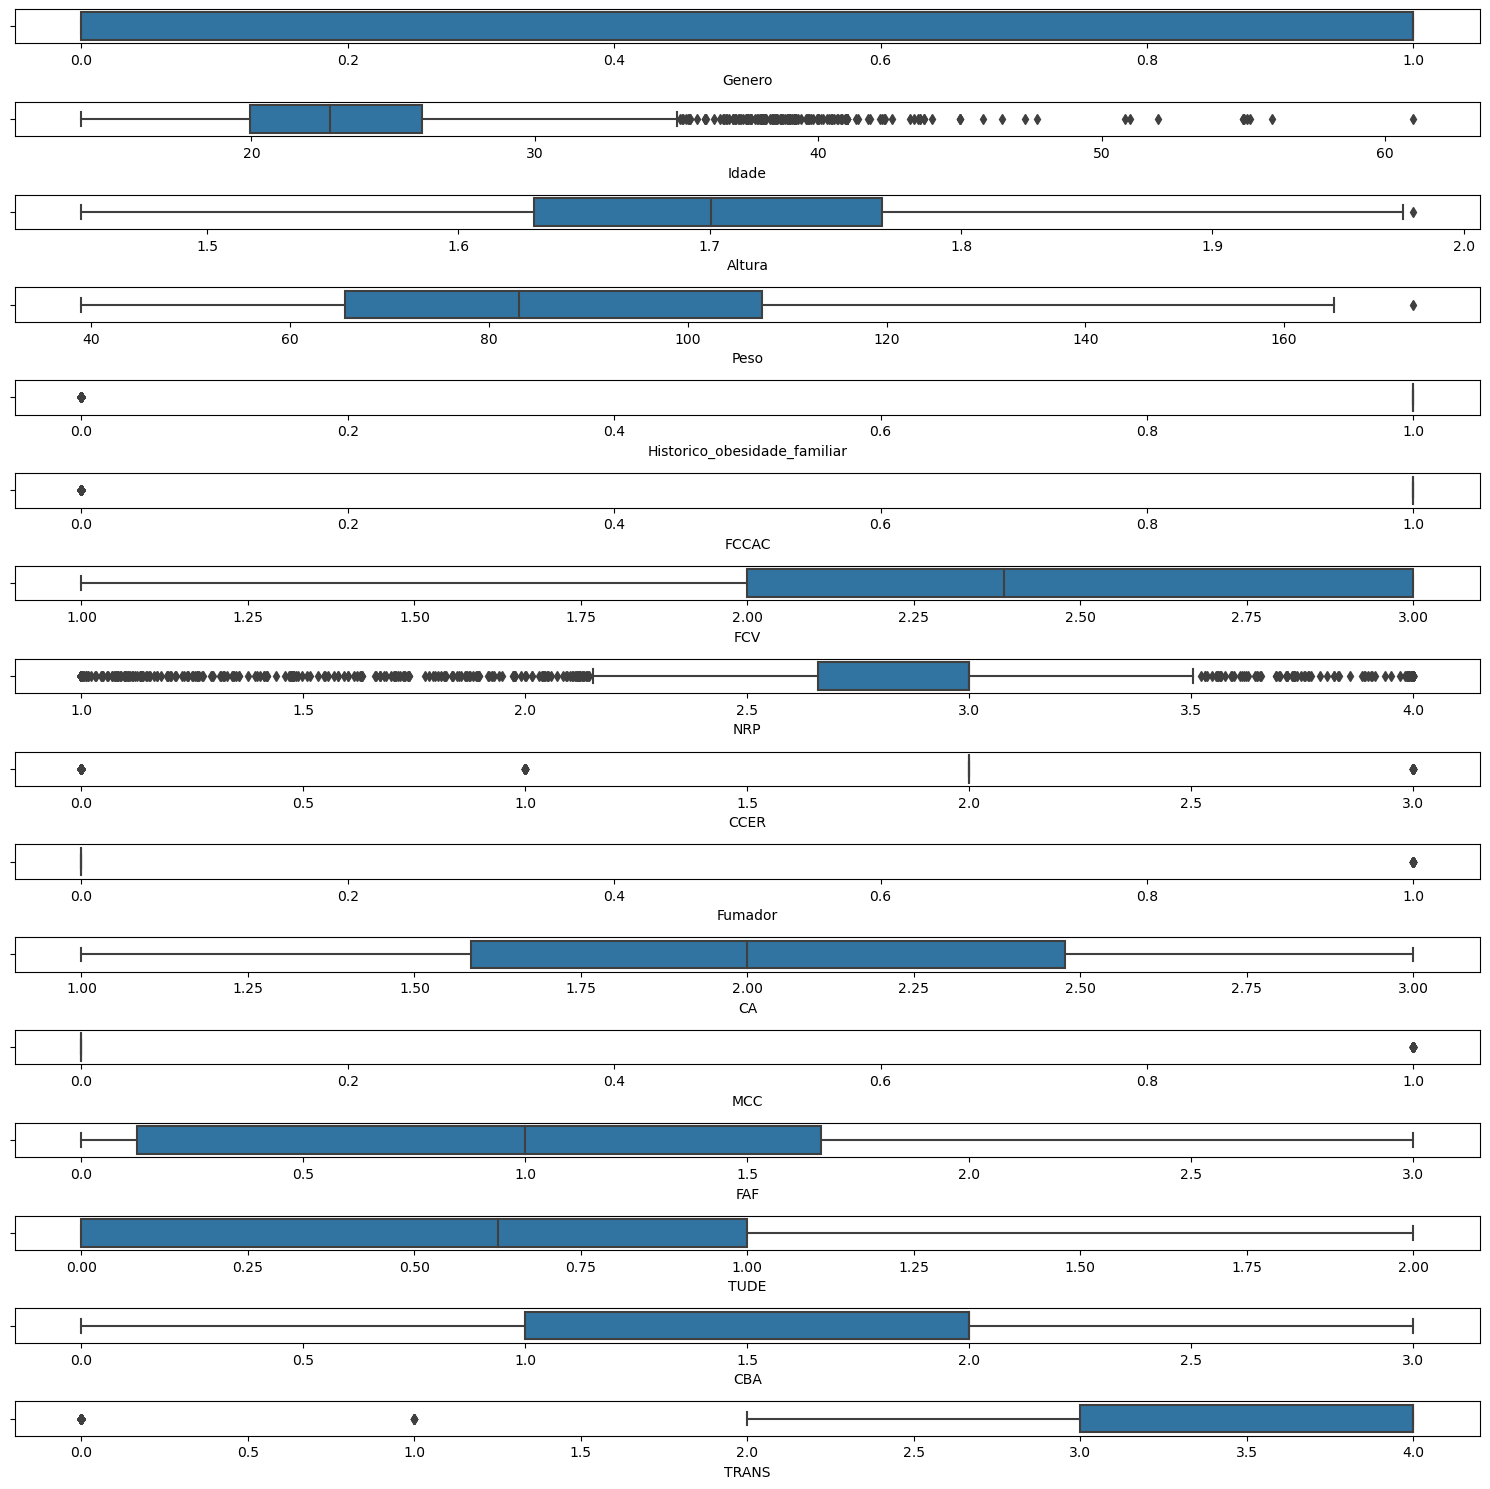

In [8]:
#outliers
# Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
fig, axs = plt.subplots(16, figsize=(15,15))
sns.boxplot(x=df['Genero'], ax=axs[0])
sns.boxplot(x=df['Idade'], ax=axs[1])
sns.boxplot(x=df['Altura'], ax=axs[2])
sns.boxplot(x=df['Peso'], ax=axs[3])
sns.boxplot(x=df['Historico_obesidade_familiar'], ax=axs[4])
sns.boxplot(x=df['FCCAC'], ax=axs[5])
sns.boxplot(x=df['FCV'], ax=axs[6])
sns.boxplot(x=df['NRP'], ax=axs[7])
sns.boxplot(x=df['CCER'], ax=axs[8])
sns.boxplot(x=df['Fumador'], ax=axs[9])
sns.boxplot(x=df['CA'], ax=axs[10])
sns.boxplot(x=df['MCC'], ax=axs[11])
sns.boxplot(x=df['FAF'], ax=axs[12])
sns.boxplot(x=df['TUDE'], ax=axs[13])
sns.boxplot(x=df['CBA'], ax=axs[14])
sns.boxplot(x=df['TRANS'], ax=axs[15])

plt.tight_layout()

/home/catia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


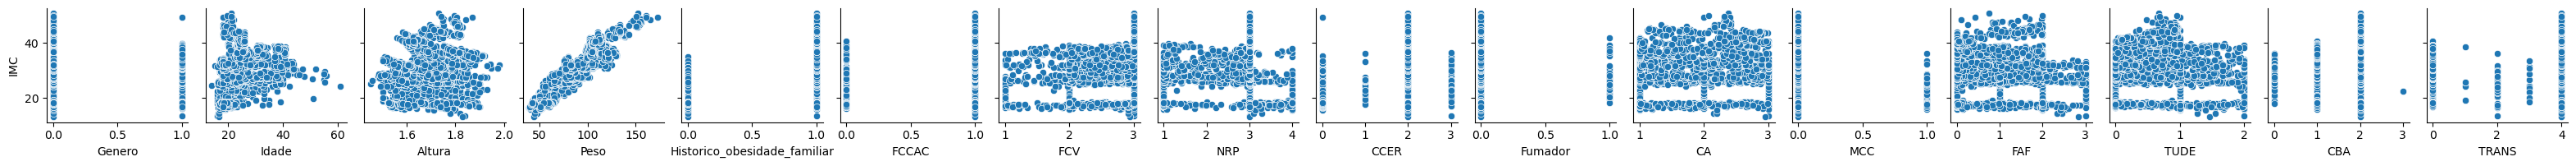

In [9]:
# Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label

plot = sns.pairplot(data=df,x_vars=['Genero','Idade','Altura','Peso','Historico_obesidade_familiar','FCCAC','FCV','NRP','CCER','Fumador','CA','MCC','FAF','TUDE','CBA', 'TRANS'], y_vars='IMC',height=2, aspect=1)

plot.savefig("plot.png")

In [10]:
df.corr()

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
Genero,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.106468,0.044698,0.107930,-0.102633,0.189607,0.017269,-0.042198,-0.152658,-0.005572,-0.053035
Idade,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.122123,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,-0.038663,-0.591649,0.021339,0.244163
Altura,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.138312,0.055499,0.213376,-0.133753,0.294709,0.051912,0.077447,-0.087343,0.043727,0.131785
Peso,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.361462,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.236161,0.037067,0.342299,0.934806
Historico_obesidade_familiar,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.280029,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.013192,-0.082118,0.059776,0.483508
FCCAC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.164451,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.139622,-0.012408,0.065047,0.246097
FCV,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.026070,0.014320,0.068461,0.071852,0.019939,-0.101135,0.076167,0.061564,0.152436,0.263651
NRP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.005835,0.007811,0.057088,-0.015624,0.129504,0.036326,0.088143,-0.057109,0.114873,0.039969
CCER,0.106468,0.122123,0.138312,0.361462,0.280029,0.164451,-0.026070,-0.005835,1.000000,-0.029245,0.096025,-0.104685,-0.031739,0.032071,0.093993,-0.103699,0.068934,0.367268
Fumador,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.029245,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.022909,-0.015842,0.070728,-0.000819


<Axes: >

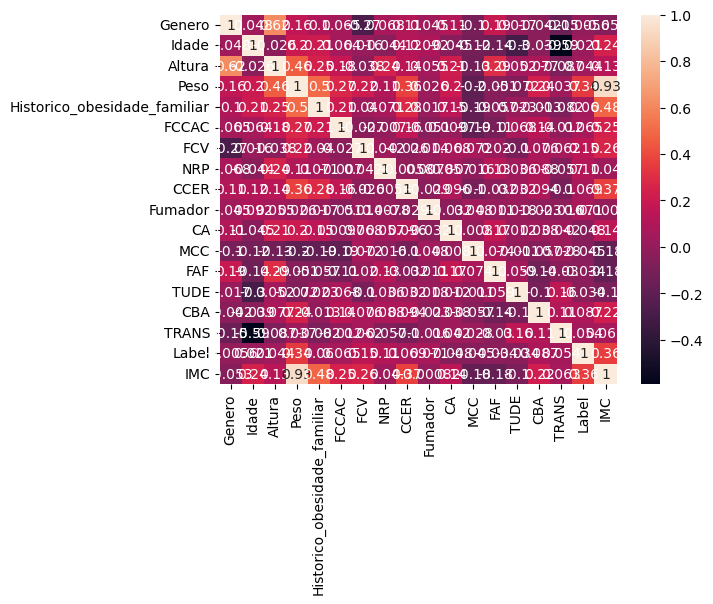

In [11]:
sns.heatmap(df.corr(), annot=True)

Holdout

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split


X = df[['Genero','Idade','Altura','Peso','Historico_obesidade_familiar','FCCAC','FCV','NRP','CCER','Fumador','CA','MCC','FAF','TUDE','CBA', 'TRANS']].to_numpy()
y = df['IMC'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print("X_train size: ", X_train.shape)
print("y_train size: ", y_train.shape)
print("\nX_test size: ", X_test.shape)
print("y_test size: ", y_test.shape)



X_train size:  (1477, 16)
y_train size:  (1477,)

X_test size:  (634, 16)
y_test size:  (634,)


In [13]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coeficients: ", mlr.coef_)
list(zip(df, mlr.coef_))

Intercept:  55.96226581236698
Coeficients:  [ 1.58176419e-01 -3.10408260e-04 -3.33455184e+01  3.31391840e-01
  6.01111583e-01  2.73718198e-01  2.29339391e-01  1.63966568e-01
  2.13700377e-01 -3.08063266e-01  4.16563242e-02 -3.16581916e-01
 -8.76233920e-02 -1.46253203e-02 -1.77032137e-01 -2.65127886e-02]


[('Genero', 0.1581764192217292),
 ('Idade', -0.0003104082600432433),
 ('Altura', -33.345518415094105),
 ('Peso', 0.33139183985023346),
 ('Historico_obesidade_familiar', 0.6011115833854836),
 ('FCCAC', 0.27371819821943827),
 ('FCV', 0.2293393913598622),
 ('NRP', 0.16396656817209024),
 ('CCER', 0.2137003767629241),
 ('Fumador', -0.30806326583847154),
 ('CA', 0.04165632423080726),
 ('MCC', -0.31658191594655244),
 ('FAF', -0.08762339204656035),
 ('TUDE', -0.014625320251064352),
 ('CBA', -0.17703213708887894),
 ('TRANS', -0.026512788556944427)]

In [14]:
y_pred = mlr.predict(X_test)

#print("Predicted for test set: {}".format(y_pred))

In [15]:
mlr_diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlr_diff.head()

,Actual,Predicted
0,25.269124,25.296631
1,47.718705,49.374647
2,40.870732,40.063927
3,29.146663,28.982068
4,32.873110,31.992046


In [16]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print("Mean Absolute Error: ", meanAbErr)
print("Mean Squared Error: ", meanSqErr)
print("R2 Score: {:.2f}".format(mlr.score(X,y)*100))

Mean Absolute Error:  0.5690154873845094
Mean Squared Error:  0.5603514873977977
R2 Score: 99.13


Regression Tree

In [17]:

X = df[['Genero','Idade','Altura','Peso','Historico_obesidade_familiar','FCCAC','FCV','NRP','CCER','Fumador','CA','MCC','FAF','TUDE','CBA', 'TRANS']].to_numpy()
y = df['IMC'].to_numpy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print("X_train size: ", X_train.shape)
print("y_train size: ", y_train.shape)
print("\nX_test size: ", X_test.shape)
print("y_test size: ", y_test.shape)

X_train size:  (1477, 16)
y_train size:  (1477,)

X_test size:  (634, 16)
y_test size:  (634,)


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

tree = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=3)
model = tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
y_pred1 = tree.predict(X_test)

MAE1 = metrics.mean_absolute_error(y_train, y_pred)
MAE2 = metrics.mean_absolute_error(y_test, y_pred1)
MAE3 = np.mean(abs(y_test - y_pred1))

print("Mean Absolute Error Train set: {:.3f}".format(MAE1))
print("Mean Absolute Error Test: {:.3f}".format(MAE2))
print("Mean Absolute Error: {:.3f}".format(MAE3))

RMSE = np.sqrt(np.mean((y_test - y_pred1)**2))
print("Root Mean Squared Error: {:.4f}".format(RMSE))

Mean Absolute Error Train set: 0.619
Mean Absolute Error Test: 0.775
Mean Absolute Error: 0.775
Root Mean Squared Error: 1.0449


Visualização da árvore de regressão

[Text(0.5302083333333333, 0.9285714285714286, 'Peso <= 92.93\nsquared_error = 64.749\nsamples = 1477\nvalue = 29.743'),
 Text(0.26666666666666666, 0.7857142857142857, 'Peso <= 60.134\nsquared_error = 24.303\nsamples = 901\nvalue = 24.543'),
 Text(0.13333333333333333, 0.6428571428571429, 'Peso <= 52.815\nsquared_error = 5.29\nsamples = 298\nvalue = 18.834'),
 Text(0.06666666666666667, 0.5, 'Altura <= 1.699\nsquared_error = 1.837\nsamples = 173\nvalue = 17.741'),
 Text(0.03333333333333333, 0.35714285714285715, 'Peso <= 46.828\nsquared_error = 1.45\nsamples = 116\nvalue = 18.259'),
 Text(0.016666666666666666, 0.21428571428571427, 'Altura <= 1.532\nsquared_error = 0.549\nsamples = 69\nvalue = 17.654'),
 Text(0.008333333333333333, 0.07142857142857142, 'squared_error = 0.414\nsamples = 19\nvalue = 18.333'),
 Text(0.025, 0.07142857142857142, 'squared_error = 0.359\nsamples = 50\nvalue = 17.396'),
 Text(0.05, 0.21428571428571427, 'Altura <= 1.585\nsquared_error = 1.447\nsamples = 47\nvalue = 1

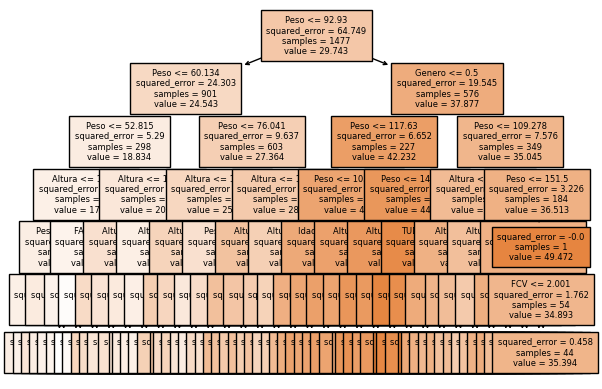

In [20]:
from sklearn import tree

tree.plot_tree(model,
               feature_names = list(df.columns),
               filled = True,
               fontsize = 6)


In [21]:
from sklearn.tree import export_text

print(export_text(model, show_weights=True))

|--- feature_3 <= 92.93
|   |--- feature_3 <= 60.13
|   |   |--- feature_3 <= 52.81
|   |   |   |--- feature_2 <= 1.70
|   |   |   |   |--- feature_3 <= 46.83
|   |   |   |   |   |--- feature_2 <= 1.53
|   |   |   |   |   |   |--- value: [18.33]
|   |   |   |   |   |--- feature_2 >  1.53
|   |   |   |   |   |   |--- value: [17.40]
|   |   |   |   |--- feature_3 >  46.83
|   |   |   |   |   |--- feature_2 <= 1.59
|   |   |   |   |   |   |--- value: [20.53]
|   |   |   |   |   |--- feature_2 >  1.59
|   |   |   |   |   |   |--- value: [18.50]
|   |   |   |--- feature_2 >  1.70
|   |   |   |   |--- feature_12 <= 2.27
|   |   |   |   |   |--- feature_2 <= 1.73
|   |   |   |   |   |   |--- value: [17.33]
|   |   |   |   |   |--- feature_2 >  1.73
|   |   |   |   |   |   |--- value: [16.49]
|   |   |   |   |--- feature_12 >  2.27
|   |   |   |   |   |--- feature_7 <= 3.05
|   |   |   |   |   |   |--- value: [13.15]
|   |   |   |   |   |--- feature_7 >  3.05
|   |   |   |   |   |   |--- value

Rede Neuronal

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

df = pd.read_csv("Dados_Trabalho_TP2.csv")

df.head()

,Unnamed: 0,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
0,0,Feminino,21.0,1.62,64.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,0.0,1.0,Nao,Transportes_Publicos,Peso_Normal
1,1,Feminino,21.0,1.52,56.0,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.0,Sim,3.0,0.0,Ocasionalmente,Transportes_Publicos,Peso_Normal
2,2,Masculino,23.0,1.80,77.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,1.0,Frequentemente,Transportes_Publicos,Peso_Normal
3,3,Masculino,27.0,1.80,87.0,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,0.0,Frequentemente,Caminhada,Excesso_Peso_Grau_I
4,4,Masculino,22.0,1.78,89.8,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.0,Nao,0.0,0.0,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II


In [23]:
binaryClasses = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
numerical_columns = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
class_columns = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
multiple_classes_columns = ["CCER", "CBA", "TRANS","Label"]

label_Encoder = LabelEncoder()

for coluna in binaryClasses:
    df[coluna] = label_Encoder.fit_transform(df[coluna].values)

for coluna in multiple_classes_columns:
    df[coluna] = label_Encoder.fit_transform(df[coluna].values)


df['IMC'] = df['Peso'] / (df['Altura'] *df['Altura'])

df.head()

,Unnamed: 0,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,1,4,8,24.386526
1,1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,4,8,24.238227
2,2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,0,4,8,23.765432
3,3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,0,2,0,26.851852
4,4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,4,1,28.342381


In [24]:
df.shape

(2111, 19)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2111 non-null   int64  
 1   Genero                        2111 non-null   int64  
 2   Idade                         2111 non-null   float64
 3   Altura                        2111 non-null   float64
 4   Peso                          2111 non-null   float64
 5   Historico_obesidade_familiar  2111 non-null   int64  
 6   FCCAC                         2111 non-null   int64  
 7   FCV                           2111 non-null   float64
 8   NRP                           2111 non-null   float64
 9   CCER                          2111 non-null   int64  
 10  Fumador                       2111 non-null   int64  
 11  CA                            2111 non-null   float64
 12  MCC                           2111 non-null   int64  
 13  FAF

In [26]:
df.describe()

,Unnamed: 0,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
count,2111.00000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1055.00000,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.771672,0.020843,2.008011,0.045476,1.010298,0.657866,1.631454,3.065846,4.311701,29.700159
std,609.53753,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.675203,0.142893,0.612953,0.208395,0.850592,0.608927,0.547840,1.653353,2.873881,8.011337
min,0.00000,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.998685
25%,527.50000,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,1.000000,3.000000,1.000000,24.325802
50%,1055.00000,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,4.000000,5.000000,28.719089
75%,1582.50000,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,2.000000,4.000000,7.000000,36.016501
max,2110.00000,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,8.000000,50.811753


In [27]:
df.dtypes

Unnamed: 0                        int64
Genero                            int64
Idade                           float64
Altura                          float64
Peso                            float64
Historico_obesidade_familiar      int64
FCCAC                             int64
FCV                             float64
NRP                             float64
CCER                              int64
Fumador                           int64
CA                              float64
MCC                               int64
FAF                             float64
TUDE                            float64
CBA                               int64
TRANS                             int64
Label                             int64
IMC                             float64
dtype: object

In [28]:
df.isnull().sum()*100/df.shape[0]

Unnamed: 0                      0.0
Genero                          0.0
Idade                           0.0
Altura                          0.0
Peso                            0.0
Historico_obesidade_familiar    0.0
FCCAC                           0.0
FCV                             0.0
NRP                             0.0
CCER                            0.0
Fumador                         0.0
CA                              0.0
MCC                             0.0
FAF                             0.0
TUDE                            0.0
CBA                             0.0
TRANS                           0.0
Label                           0.0
IMC                             0.0
dtype: float64

In [29]:
colnames_numerics_only = df.select_dtypes(include=[np.number]).columns.tolist()
colnames_numerics_only

['Unnamed: 0',
 'Genero',
 'Idade',
 'Altura',
 'Peso',
 'Historico_obesidade_familiar',
 'FCCAC',
 'FCV',
 'NRP',
 'CCER',
 'Fumador',
 'CA',
 'MCC',
 'FAF',
 'TUDE',
 'CBA',
 'TRANS',
 'Label',
 'IMC']

In [30]:
def normalize(y):
    return (y - y.min()) / (y.max() - y.min())



In [31]:
df.IMC.describe()

count    2111.000000
mean       29.700159
std         8.011337
min        12.998685
25%        24.325802
50%        28.719089
75%        36.016501
max        50.811753
Name: IMC, dtype: float64

In [32]:
data_norm = df.apply(normalize)

In [33]:
print(data_norm['IMC'].describe())
print(data_norm.describe())

count    2111.000000
mean        0.441685
std         0.211867
min         0.000000
25%         0.299556
50%         0.415740
75%         0.608726
max         1.000000
Name: IMC, dtype: float64
       Unnamed: 0       Genero        Idade       Altura         Peso  \
count  2111.00000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.50000     0.505921     0.219417     0.474863     0.355120   
std       0.28888     0.500083     0.135021     0.176047     0.195457   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%       0.25000     0.000000     0.126536     0.339623     0.197562   
50%       0.50000     1.000000     0.186764     0.472640     0.328358   
75%       0.75000     1.000000     0.255319     0.600875     0.510677   
max       1.00000     1.000000     1.000000     1.000000     1.000000   

       Historico_obesidade_familiar        FCCAC          FCV          NRP  \
count                   2111.000000  2111.000000  2111.000000  2111.00

In [34]:
n_rows = len(data_norm)
index = np.random.choice(n_rows, size = int(0.7*n_rows), replace = False)

data_train = data_norm.iloc[index]
data_test = data_norm.drop(index)

print('Train: ')
print(data_train['IMC'].describe())
print('Test: ')
print(data_test['IMC'].describe())

Train: 
count    1477.000000
mean        0.441998
std         0.212727
min         0.000000
25%         0.299864
50%         0.417578
75%         0.610925
max         1.000000
Name: IMC, dtype: float64
Test: 
count    634.000000
mean       0.440956
std        0.210015
min        0.007746
25%        0.298842
50%        0.413693
75%        0.603242
max        0.964579
Name: IMC, dtype: float64


In [35]:
X_train = data_train.drop('IMC', axis = 1)
y_train = data_train['IMC']

X_test = data_test.drop('IMC', axis = 1)
y_test = data_test['IMC']


In [36]:
Nhidden = 5

nn = MLPRegressor(hidden_layer_sizes=(Nhidden,), activation='tanh', solver='lbfgs', max_iter=1000, learning_rate_init=0.001)

nn.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(5,), max_iter=1000,
             solver='lbfgs')

In [37]:
pred = nn.predict(X_test)

test_set_rsquared = nn.score(X_test, y_test)
test_set_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

print('Test set R^2: {:.5f}'.format(test_set_rsquared))
print('Test set RMSE: {:.2f}'.format(test_set_rmse))

Test set R^2: 0.99696
Test set RMSE: 0.01


In [43]:
print("Número de camadas:", len(nn.coefs_))
for i, coef in enumerate(nn.coefs_):
    print(f"Camada {i + 1} - Neurônios: {coef.shape[0]} -> {coef.shape[1]}")
import matplotlib.pyplot as plt
import numpy as np

#Função para visualizar os pesos
def plotweights(coefs):
    fig, axes = plt.subplots(1, len(coefs), figsize=(20, 5))
    for i, coef in enumerate(coefs):
        axes[i].imshow(coef, cmap='viridis')
        axes[i].set_title(f'Camada {i + 1}')
        axes[i].set_xlabel('Neurônios de saída')
        axes[i].set_ylabel('Neurônios de entrada')
    plt.show()




Número de camadas: 2
Camada 1 - Neurônios: 18 -> 5
Camada 2 - Neurônios: 5 -> 1
